## MDP analysis

In this tutorial, we selected a **multi-domain protein (MDP)** from the **Protein Ensemble Database (PED)** to demonstrate how **IDPET** can be used to study proteins that contain both folded domains and intrinsically disordered regions.  

As an example, we examine the ensemble properties of **Calmodulin 1**, which consists of two folded domains connected by a disordered linker.

In the first step, we load the ensemble from a local multi-model PDB file located in the example directory. Using the `residue_range` argument, we can select specific sequence ranges for analysis.  

In this example, we extracted three different segments: the **full-length protein**, the **linker**, and the **first domain**.


In [13]:
import idpet
import matplotlib.pyplot as plt
from idpet.ensemble import Ensemble
from idpet.ensemble_analysis import EnsembleAnalysis
from idpet.visualization import *
from idpet.utils import set_verbosity


set_verbosity("INFO")  # Change verbosity level to show more information when performing the analysis.

ens_codes = [
    Ensemble(code='full_length', data_path='../example/PED00133e000.pdb'),
    Ensemble(code='linker', data_path='../example/PED00133e000.pdb', residue_range=(73,84)),
    Ensemble(code='domain_1', data_path='../example/PED00133e000.pdb', residue_range=(1,72)),
]

analysis = EnsembleAnalysis(ens_codes)
analysis.load_trajectories()
vis = Visualization(analysis);

full_length chain ids: ['A']
linker chain ids: ['A']
Selected residues from ensemble linker
domain_1 chain ids: ['A']
Selected residues from ensemble domain_1


Using the `get_features_summary_dataframe` method of the `EnsembleAnalysis` class, we can obtain the general properties of the different segments of this protein.  

For instance, the apparent **Flory exponent** indicates that the **linker segment** in the ensemble is relatively expanded, with a value of approximately **0.7**, whereas the **first folded domain** is highly compact.
This observation is important for multi-domain proteins (MDPs), as analyzing only the full-length protein could be misleading when interpreting the ensemble properties of the disordered region.



In [8]:
analysis.get_features_summary_dataframe()

,ensemble_code,n_residues,n_conformers,rg_mean,rg_std,asphericity_mean,asphericity_std,prolateness_mean,prolateness_std,sasa_mean,sasa_std,end_to_end_mean,end_to_end_std,flory_exponent,flory_exponent_err
0,full_length,148,30,2.240481,0.295873,0.443551,0.155839,0.098059,0.070192,113.226196,2.590138,3.710445,1.337403,0.313976,0.016520
1,linker,12,30,1.027938,0.098956,0.562265,0.135402,0.086636,0.079112,19.366106,0.730859,2.596076,0.454019,0.715562,0.035800
2,domain_1,72,30,1.323554,0.025792,0.204324,0.026662,0.117338,0.023844,53.544510,0.869853,2.034291,0.352521,0.154066,0.023122


The **asphericity** distribution for different segments of *Calmodulin 1* shows distinct structural characteristics.  
The **linker** region exhibits higher asphericity values, indicating an extended and anisotropic shape typical of disordered regions.

<Axes: ylabel='Asphericity'>

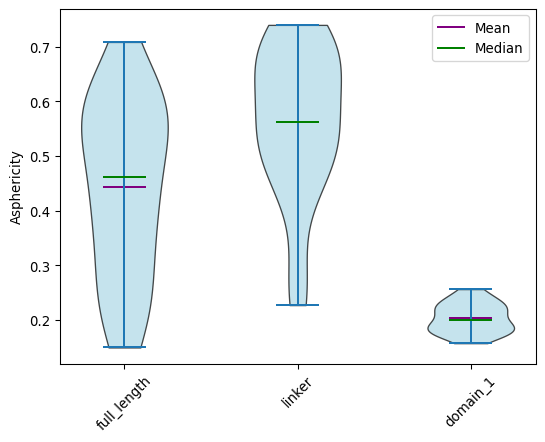

In [10]:
vis.asphericity(bins=5, violin_plot=True, multiple_hist_ax=True, hist_range=(0, 1), summary_stat='both')

The **normalized end-to-end distance** distributions \((R_{ee}/R_g)\) provide insight into the overall conformational expansion of different segments in *Calmodulin 1*.  

The **linker** segment shows the largest \(R_{ee}/R_g\) values, indicating an extended and flexible conformation typical of intrinsically disordered regions.  

End-to-End distances distribution plot saved to C:\Users\hamid\.idpet\data\plots/e2e_distances_full_length.png


<Axes: title={'center': 'Normalized End-to-End Distance ($R_{ee} / \\langle R_g \\rangle$) Distribution'}, ylabel='$R_{ee} / \\langle R_g \\rangle$'>

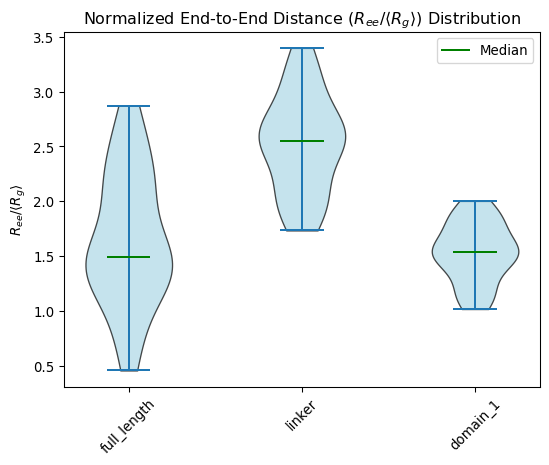

In [21]:
vis.end_to_end_distances(bins=30,rg_norm=True,violin_plot=True, multiple_hist_ax=True, hist_range=(0, 5), summary_stat='median', dpi=96, save=True)

The distance maps provide a residue-wise view of intra- and inter-domain organization within the ensemble of *Calmodulin 1*.  
Each heatmap represents pairwise distances either between **Cα atoms (CA)** or **centers of mass (COM)** of residues or segments.  

For the **full-length protein**, both CA and COM maps reveal two dense regions corresponding to the folded domains, separated by a more extended region that represents the disordered linker.  
The **linker** itself shows a smooth gradient of distances, consistent with its flexible and extended nature, while **domain 1** displays tightly clustered distances typical of a compact folded structure.  

# Ensemble: full_length
features: (30, 10731)
# Ensemble: linker
features: (30, 55)
# Ensemble: domain_1
features: (30, 2485)
Distance maps saved to C:\Users\hamid\.idpet\data\plots/dist_both.png


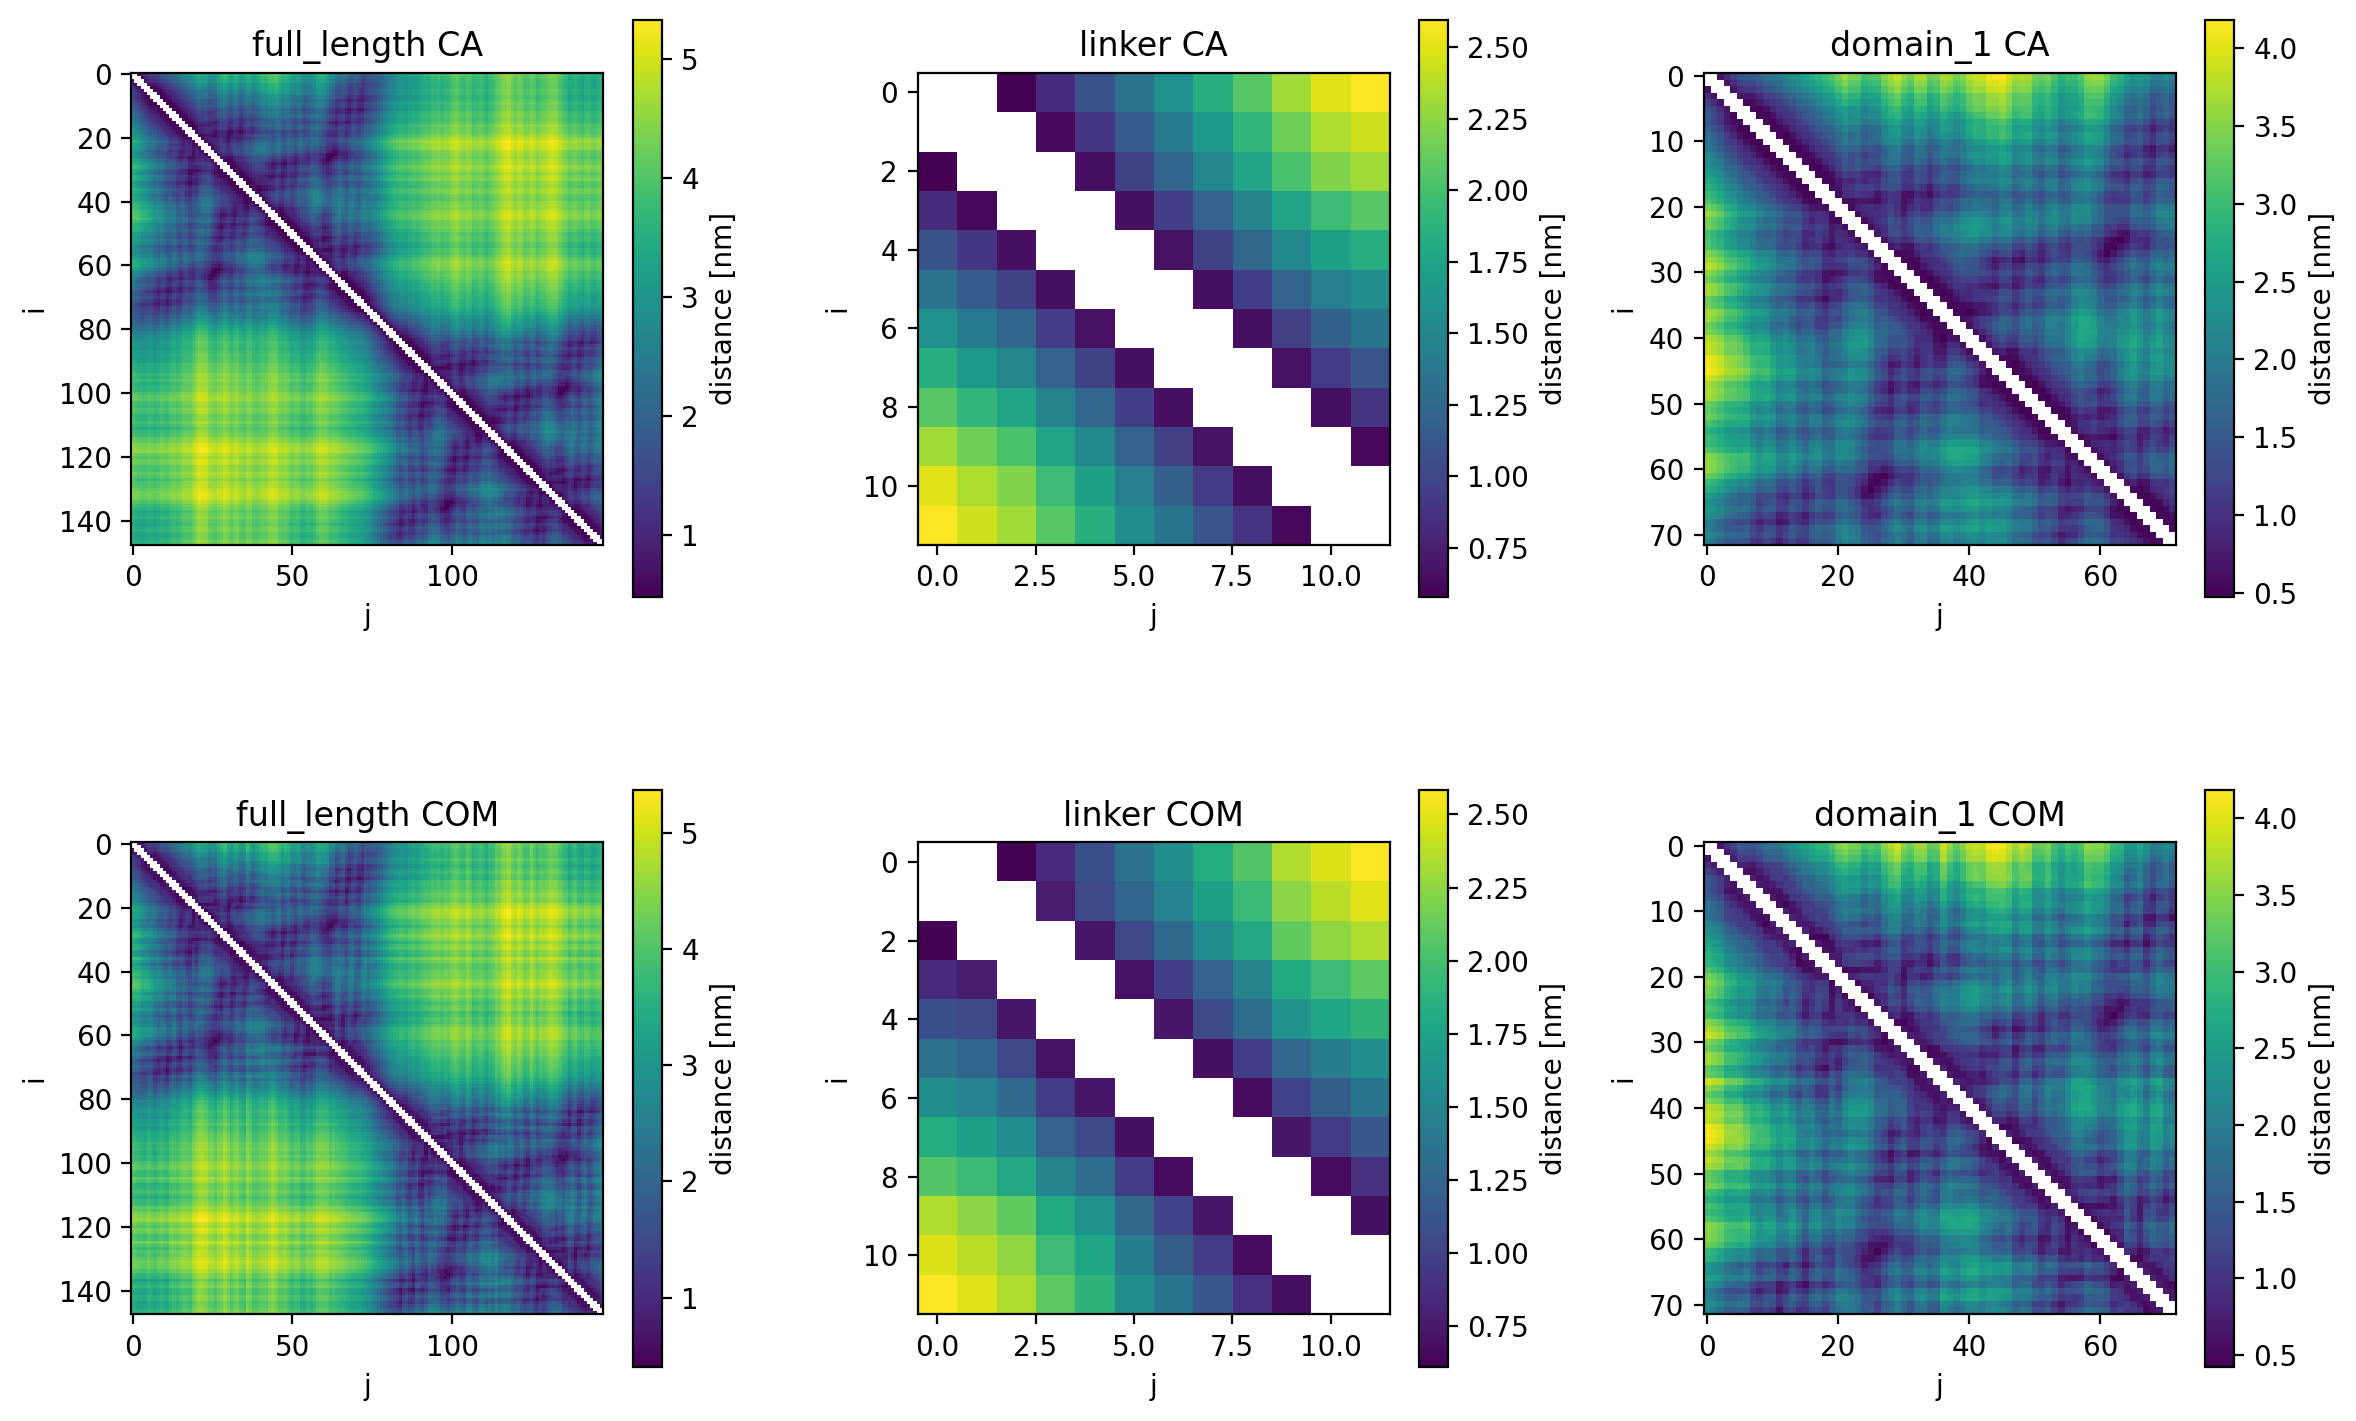

In [23]:
vis.distance_maps(min_sep=2,max_sep=None, distance_type='both', dpi=200,inverse=False ,save=True, get_names=True, color='viridis');

The **Ramachandran plots** depict the backbone dihedral angle distributions (ϕ, ψ) for different segments of *Calmodulin 1*.  
These maps illustrate the conformational preferences of residues within each region of the ensemble.  

The **folded domain** exhibits a well-defined cluster in the α-helical region, reflecting its stable secondary structure.  
In contrast, the **linker** region shows a broad and scattered distribution across the ϕ–ψ space, consistent with high conformational flexibility typical of intrinsically disordered regions.  
The **full-length protein** displays a combination of both behaviors, with clear helical populations from the domains and more dispersed conformations from the linker.  

C:\Users\hamid\idpet\EnsembleTools\idpet\visualization.py:2690: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=3.0)
Ramachandran plot saved to C:\Users\hamid\.idpet\data\plots/ramachandran_full_length.png


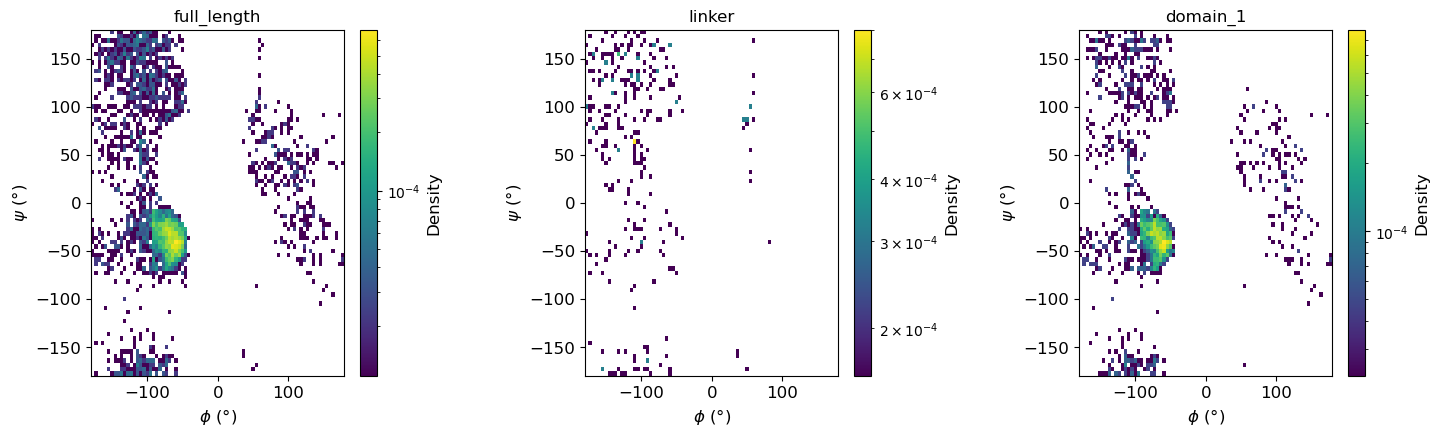

In [28]:
vis.ramachandran_plots(two_d_hist=True ,dpi=200, save=True, color='viridis', bins=(-180, 180, 80), log_scale=True);

In [31]:
ens_codes = [
    Ensemble(code='full_length', data_path='../example/PED00133e000.pdb'),
]

analysis = EnsembleAnalysis(ens_codes)
analysis.load_trajectories()
vis = Visualization(analysis);

full_length chain ids: ['A']


The **site-specific flexibility profile** provides residue-level insights into the dynamic behavior of *Calmodulin 1* within the ensemble.  
Flexibility is quantified for each residue, allowing identification of regions with higher structural variability.  

The vertical dashed lines indicate the boundaries of the **first folded domain** and the **linker** region, as defined by the `pointer` argument.  
Notably, the pronounced peak around residues **38–45** corresponds to a **loop region** within the first domain, suggesting enhanced local flexibility even within the otherwise compact structure.  
The linker region shows consistently elevated flexibility values, consistent with its intrinsically disordered nature.  

Site-specific flexibility plot saved to C:\Users\hamid\.idpet\data\plots/ss_flexibility_full_length.png


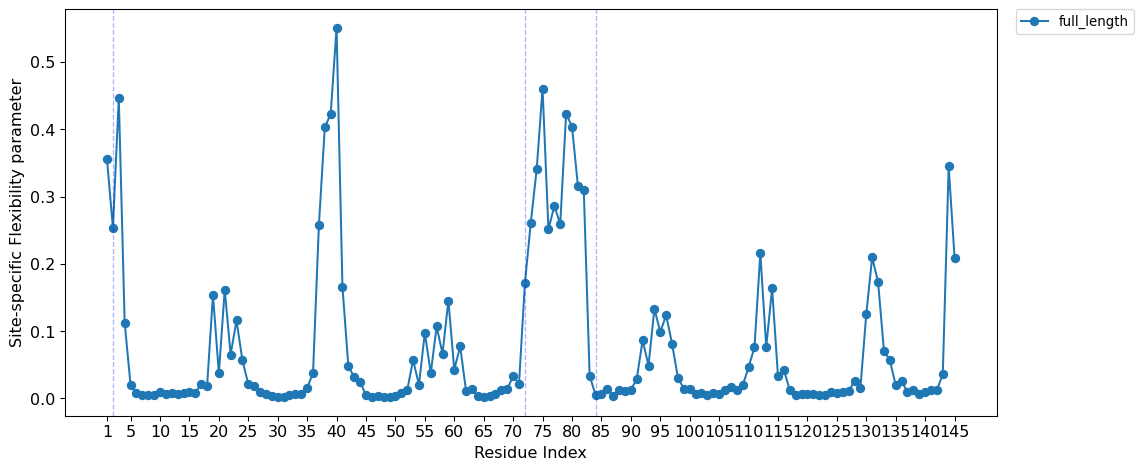

In [33]:
vis.site_specific_flexibility(pointer=[2,72,84], figsize=(12, 5),auto_xticks=False ,xtick_interval=5, save=True);

## Limitations of MDP Analysis in IDPET

- Currently, **IDPET** does not support applying dimensionality reduction methods (e.g., PCA, t-SNE, UMAP) to **segments of different lengths** within the same analysis.  
  This limitation arises because these methods require feature vectors of equal dimensions across all analyzed ensembles or segments.
